# Code of Information Visualization Final Report

YAM38

## Loads Data

In [ ]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import gzip
import urllib.request
import seaborn as sns
from collections import Counter
from collections import defaultdict
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress

def print_graph_stats(title, g):
    print("Simple stats for: " + title)
    print("# of nodes: " + str(len(g.nodes())))
    print("# of edges: " + str(len(g.edges())))
    print("Is graph connected? " + str(nx.is_connected(g)))

numberL = ['04', '05', '06', '08','09', '24', '25', '30', '31']
urlLeft = 'http://snap.stanford.edu/data/p2p-Gnutella'
urlRight = '.txt.gz'
nameL = 'p2p-Gnutella'
nameR = '.txt'
Gs = []
for number in numberL:
  url = urlLeft + number + urlRight
  name = nameL + number + nameR
  # Download file from SNAP and uncompress it.
  response = urllib.request.urlopen(url)
  with open(name, 'wb') as outfile:
    outfile.write(gzip.decompress(response.read()))
  G = nx.read_edgelist(name)
  print_graph_stats("Gnutella p2p graph", G)
  Gs.append(G)

Simple stats for: Gnutella p2p graph
# of nodes: 10876
# of edges: 39994
Is graph connected? True
Simple stats for: Gnutella p2p graph
# of nodes: 8846
# of edges: 31839
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 8717
# of edges: 31525
Is graph connected? True
Simple stats for: Gnutella p2p graph
# of nodes: 6301
# of edges: 20777
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 8114
# of edges: 26013
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 26518
# of edges: 65369
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 22687
# of edges: 54705
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 36682
# of edges: 88328
Is graph connected? False
Simple stats for: Gnutella p2p graph
# of nodes: 62586
# of edges: 147892
Is graph connected? False


## Degree Correlation

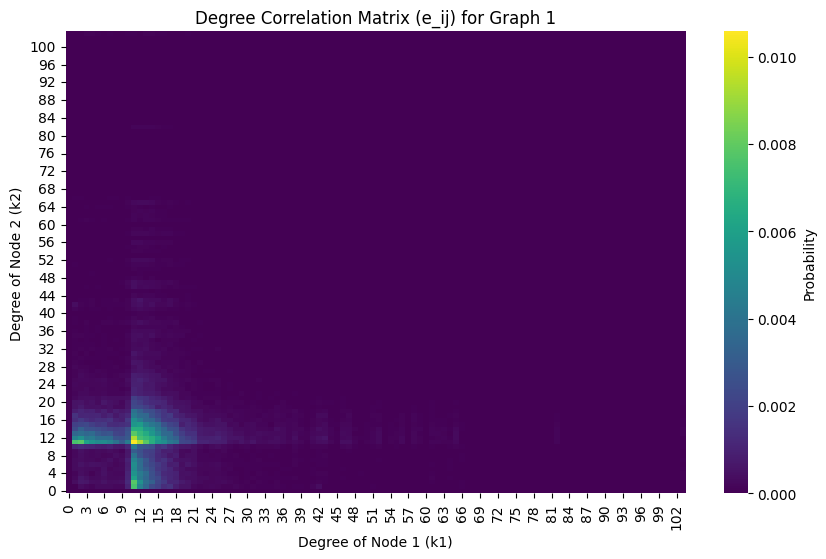

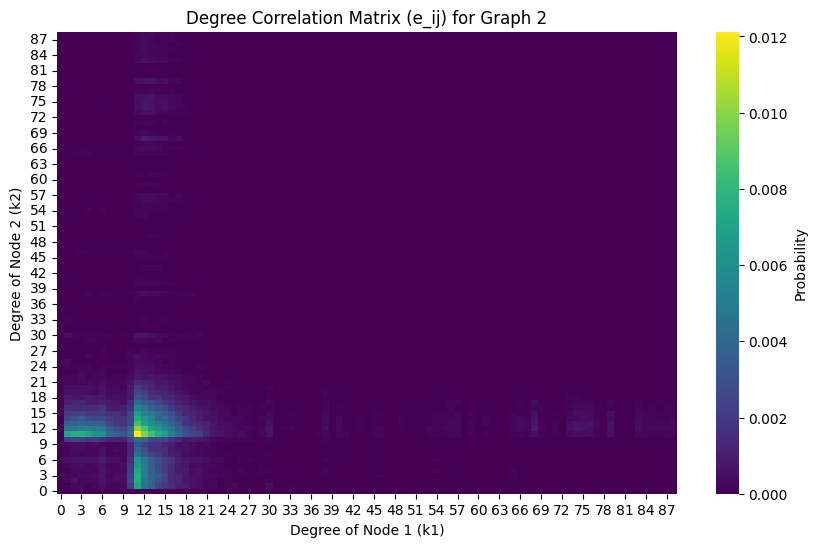

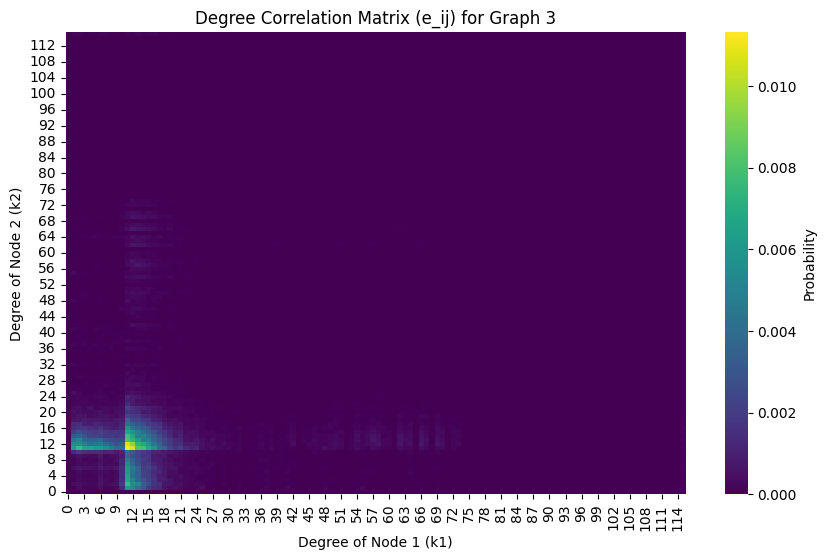

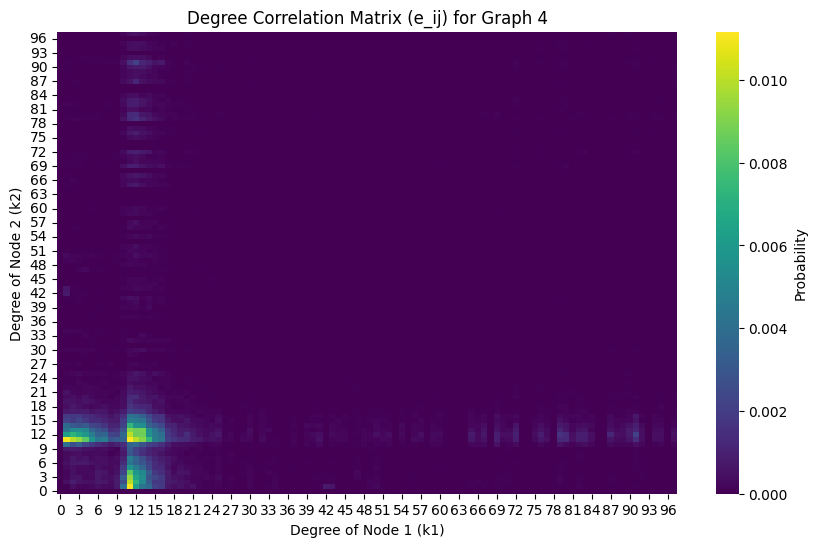

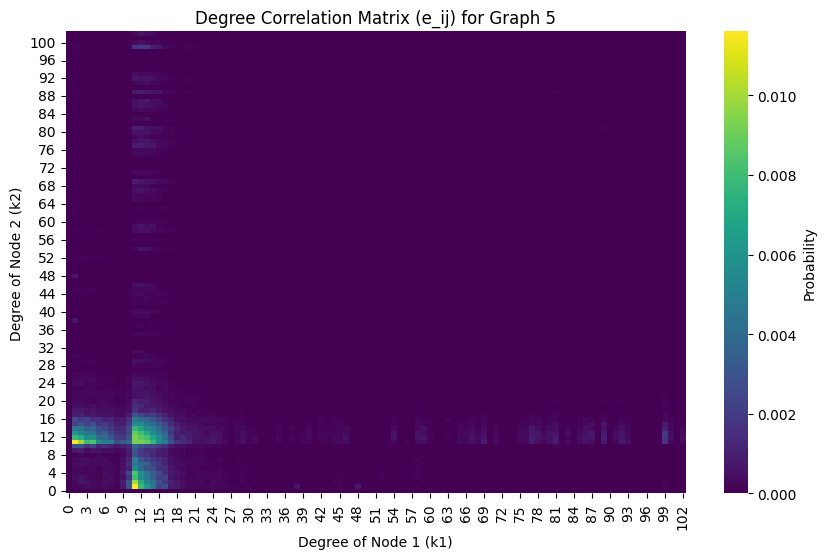

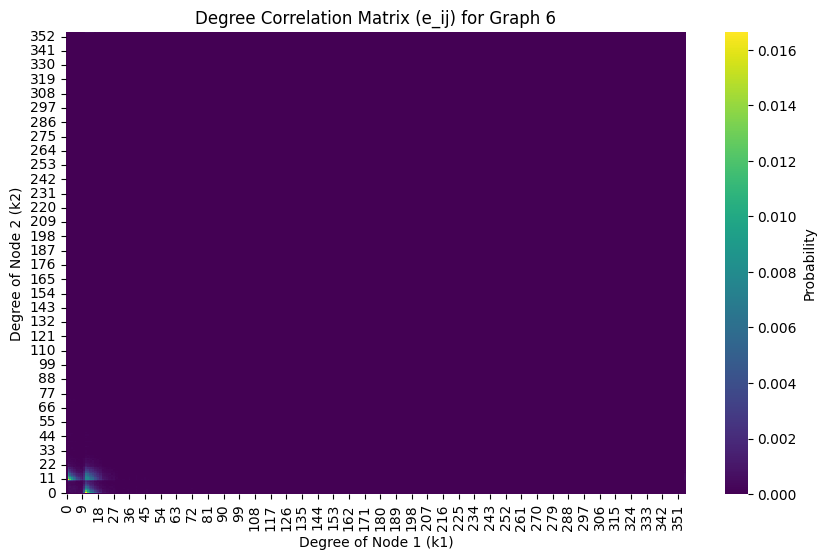

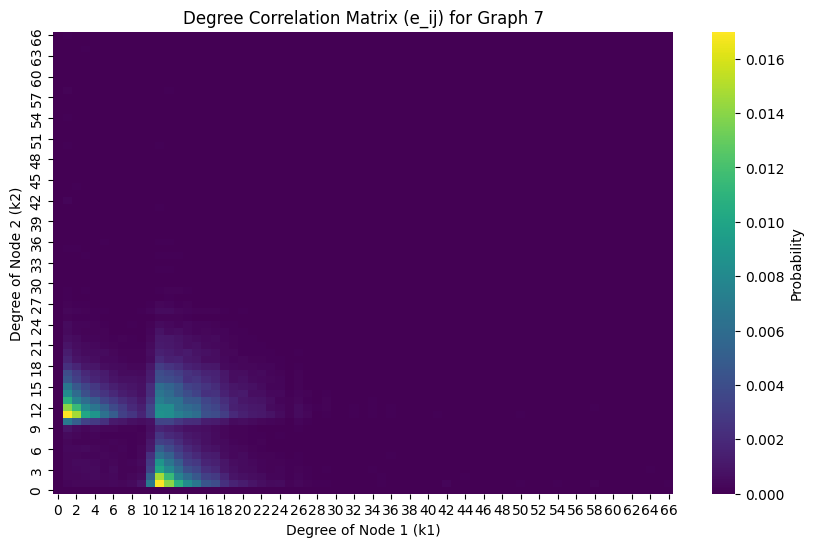

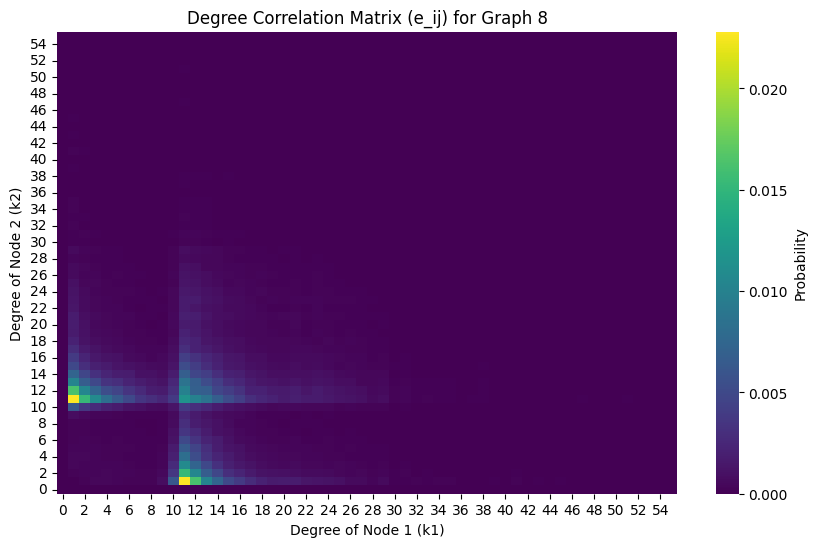

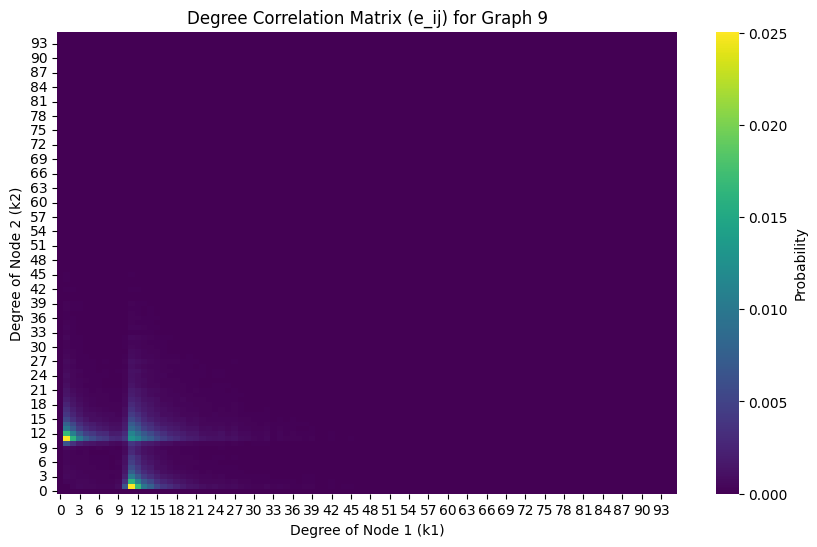

In [ ]:
def degree_correlation_matrix(G):
    joint_degree_dist = defaultdict(int)
    for u, v in G.edges():
        k1, k2 = G.degree(u), G.degree(v)
        joint_degree_dist[(k1, k2)] += 1
        joint_degree_dist[(k2, k1)] += 1

    total_links = sum(joint_degree_dist.values())
    max_degree = max(dict(G.degree()).values())
    e_ij = np.zeros((max_degree + 1, max_degree + 1))

    for (k1, k2), count in joint_degree_dist.items():
        e_ij[k1, k2] = count / total_links

    return e_ij

for i, G in enumerate(Gs):
    e_ij = degree_correlation_matrix(G)

    plt.figure(figsize=(10, 6))
    sns.heatmap(e_ij, cmap='viridis', cbar_kws={'label': 'Probability'})
    plt.xlabel('Degree of Node 1 (k1)')
    plt.ylabel('Degree of Node 2 (k2)')
    plt.title(f'Degree Correlation Matrix (e_ij) for Graph {i + 1}')
    plt.gca().invert_yaxis()
    plt.show()


## Topology

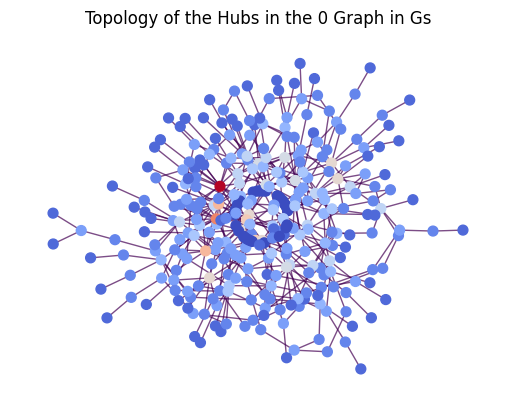

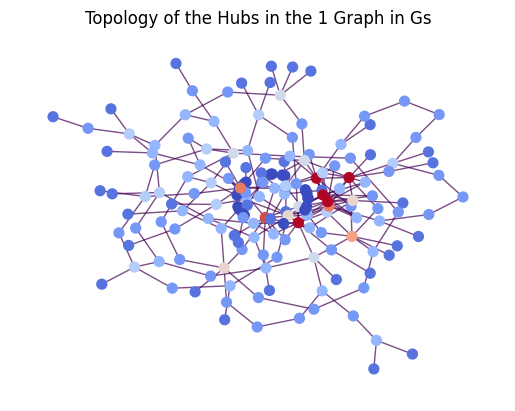

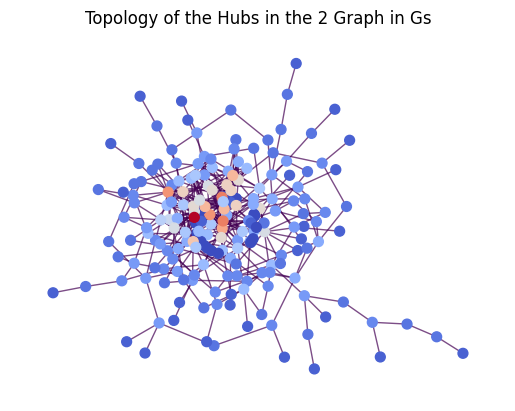

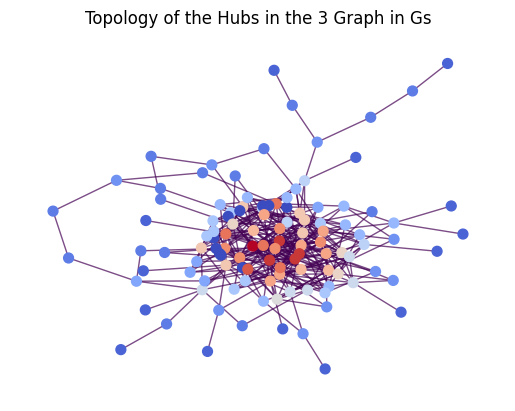

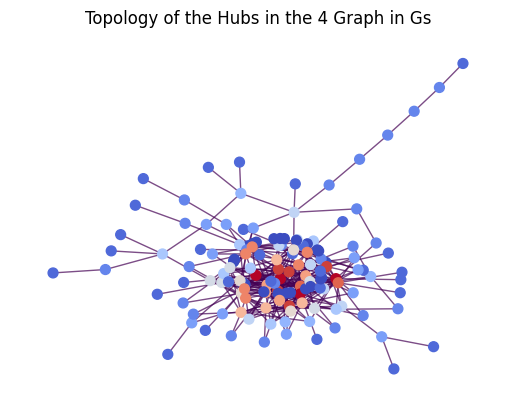

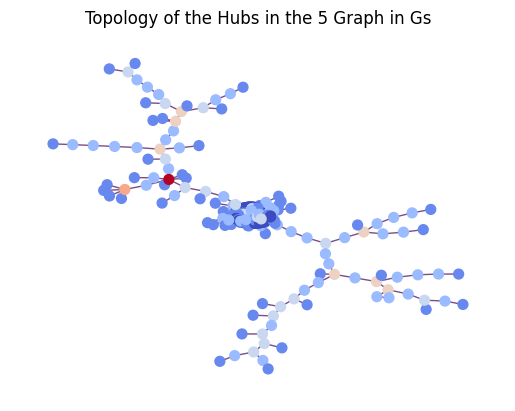

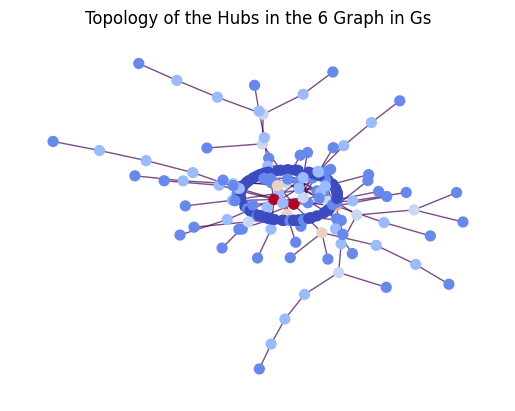

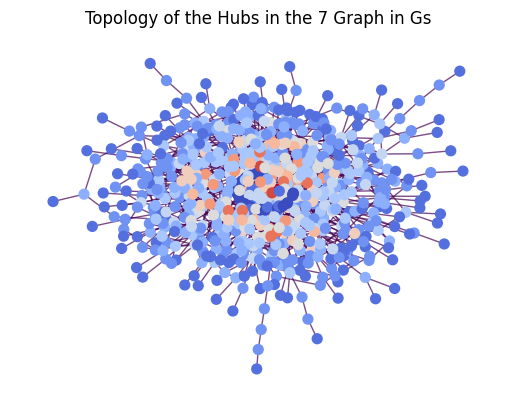

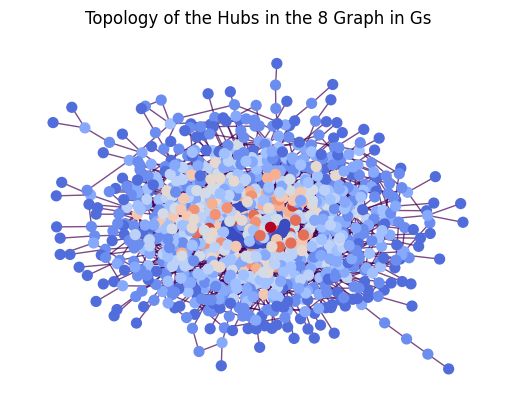

In [ ]:
for i, G in enumerate(Gs):
  degree_threshold = 20

  node_degrees = dict(G.degree())
  hubs = {node for node, degree in node_degrees.items() if degree > degree_threshold}
  hub_subgraph = G.subgraph(hubs)
  pos = nx.kamada_kawai_layout(hub_subgraph)

  node_colors = [degree for _, degree in hub_subgraph.degree()]
  norm = plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
  cmap = plt.cm.coolwarm
  node_colors = cmap(norm(node_colors))
  nx.draw_networkx_nodes(hub_subgraph, pos, node_size=50, node_color=node_colors)

  edge_colors = [hub_subgraph[u][v].get('weight', 1) for u, v in hub_subgraph.edges()]
  norm = plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))
  cmap = plt.cm.viridis
  edge_colors = cmap(norm(edge_colors))
  nx.draw_networkx_edges(hub_subgraph, pos, edge_color=edge_colors, alpha=0.7)

  plt.title("Topology of the Hubs in the {} Graph in Gs".format(i))
  plt.axis('off')
  plt.show()

## Topology with Legend

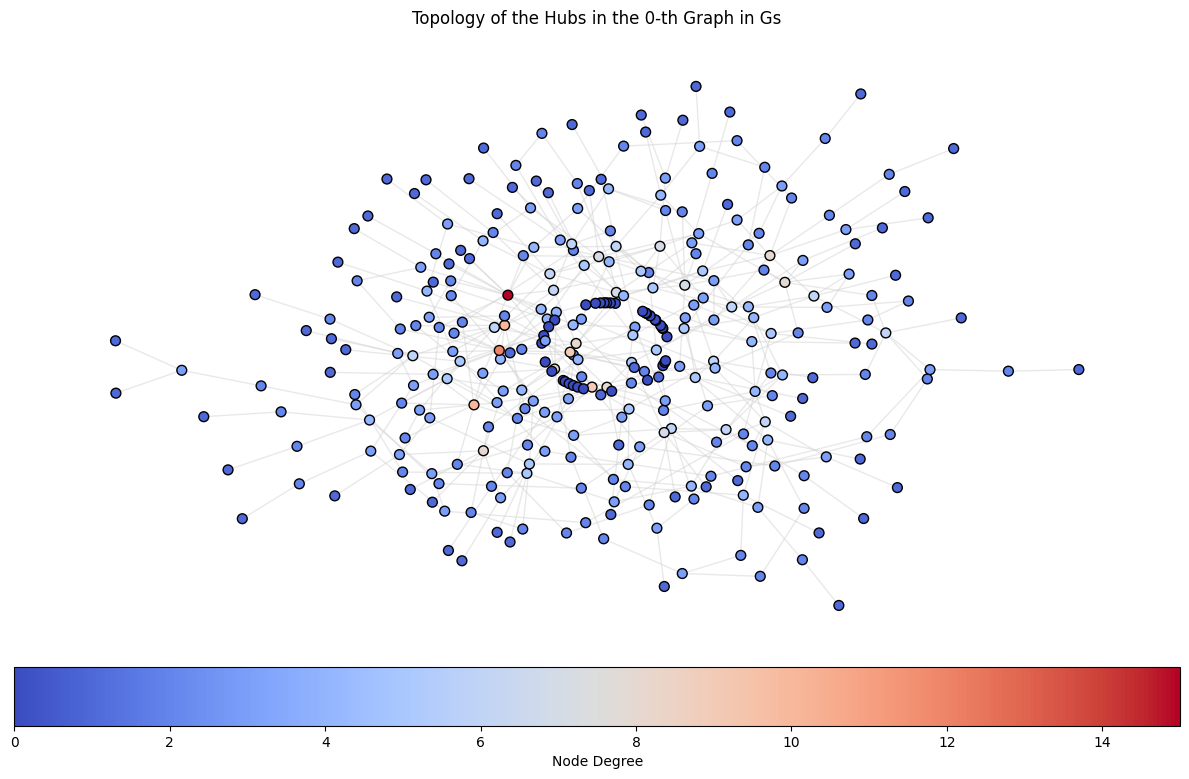

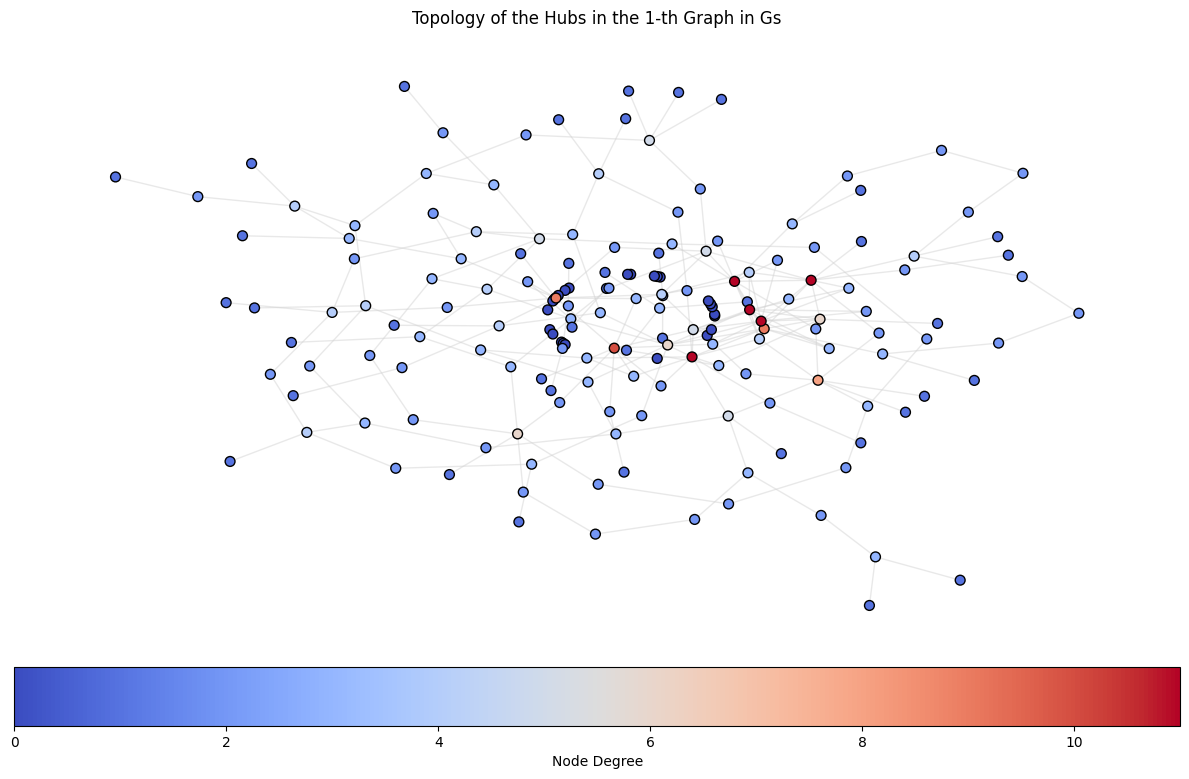

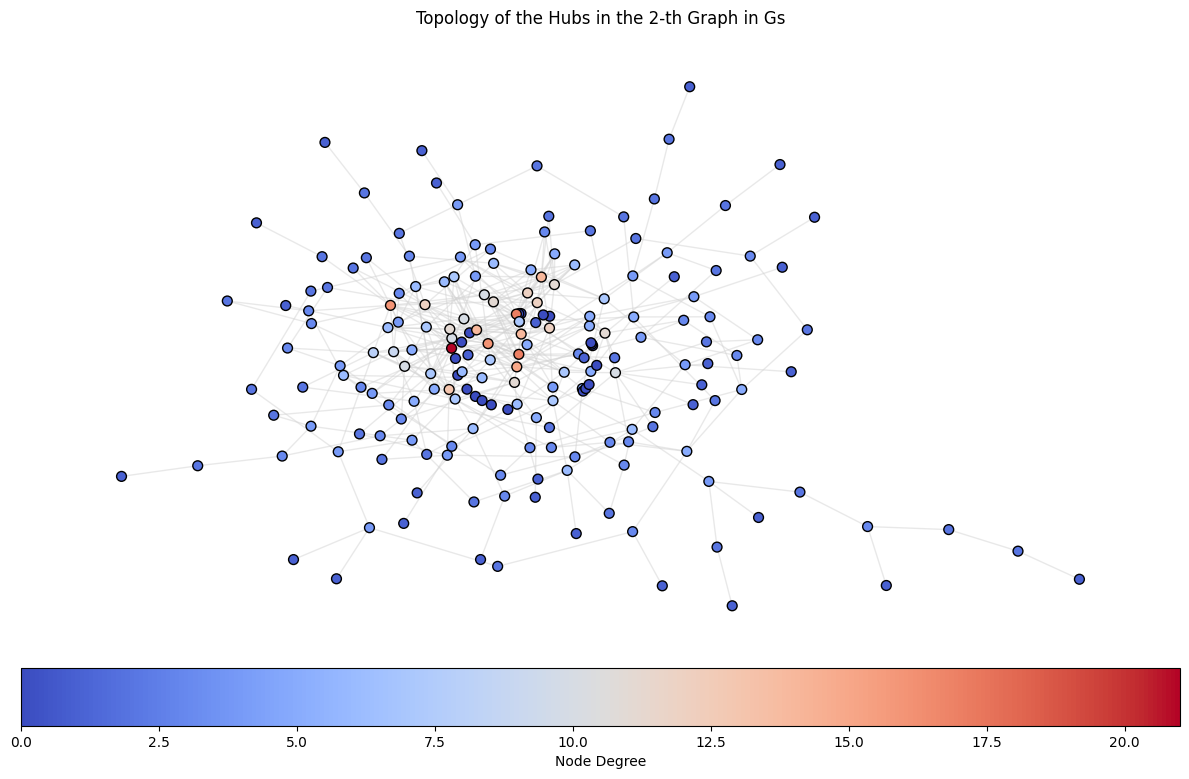

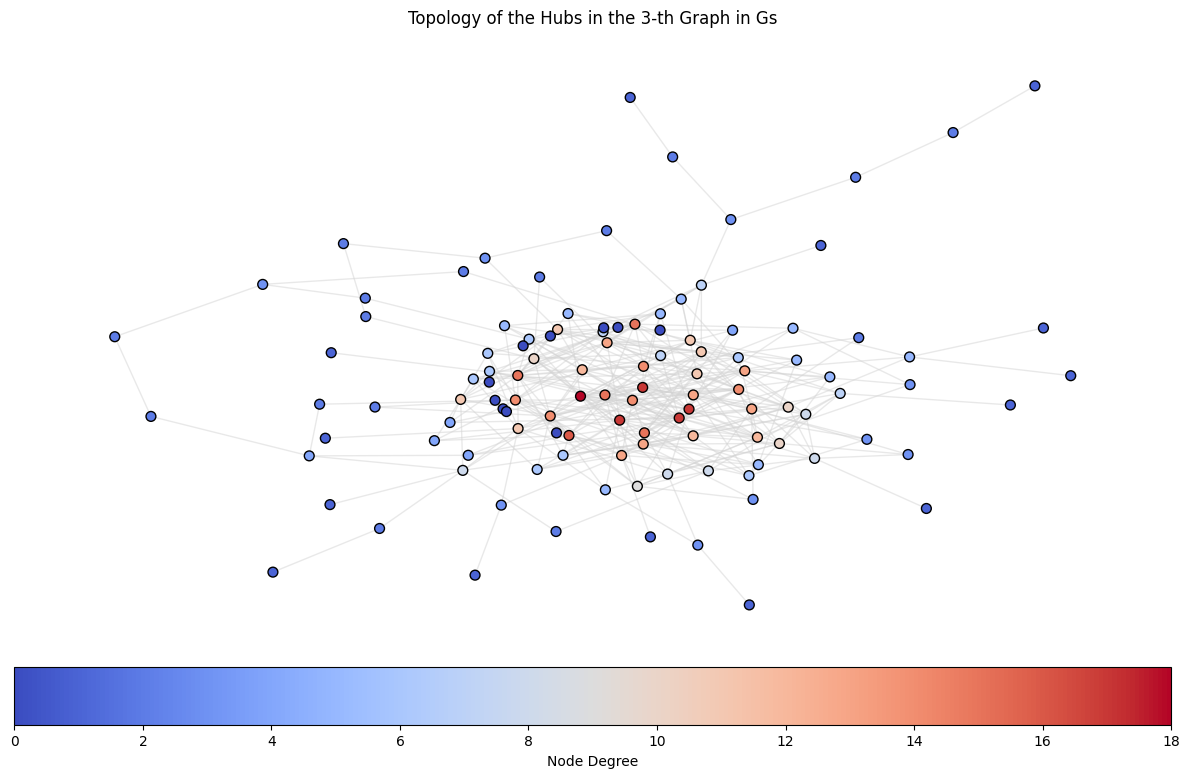

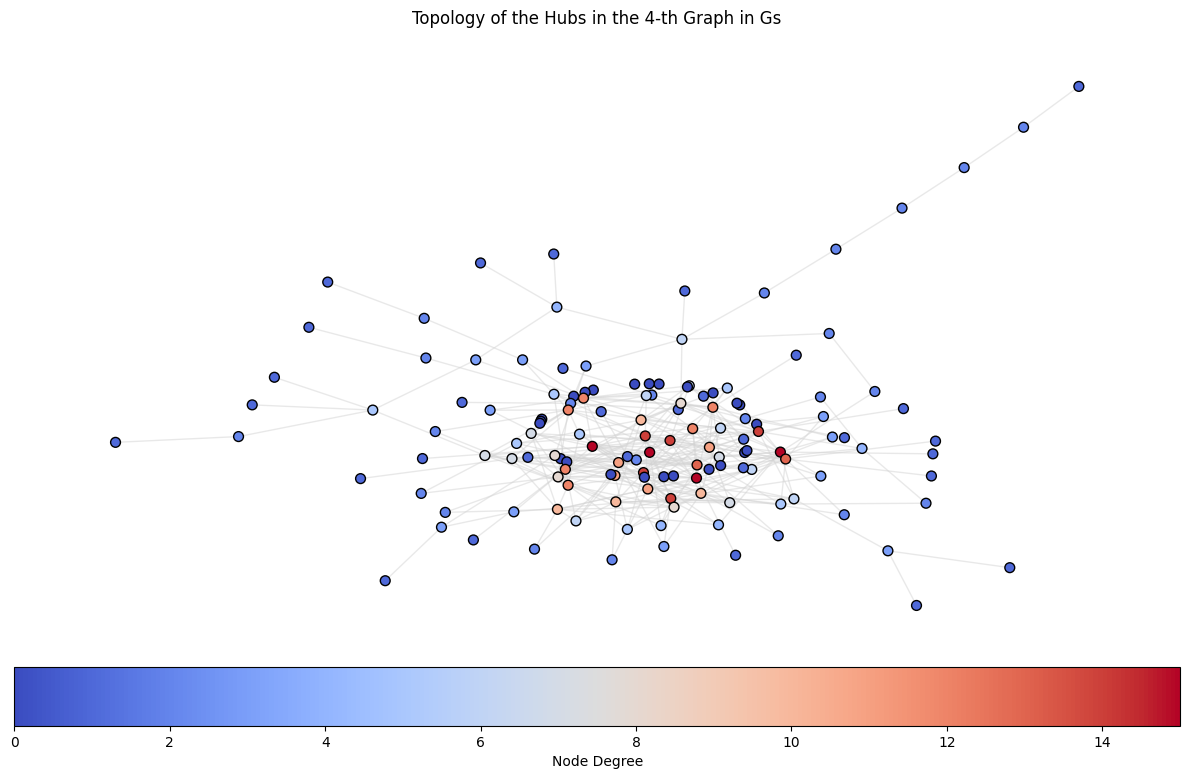

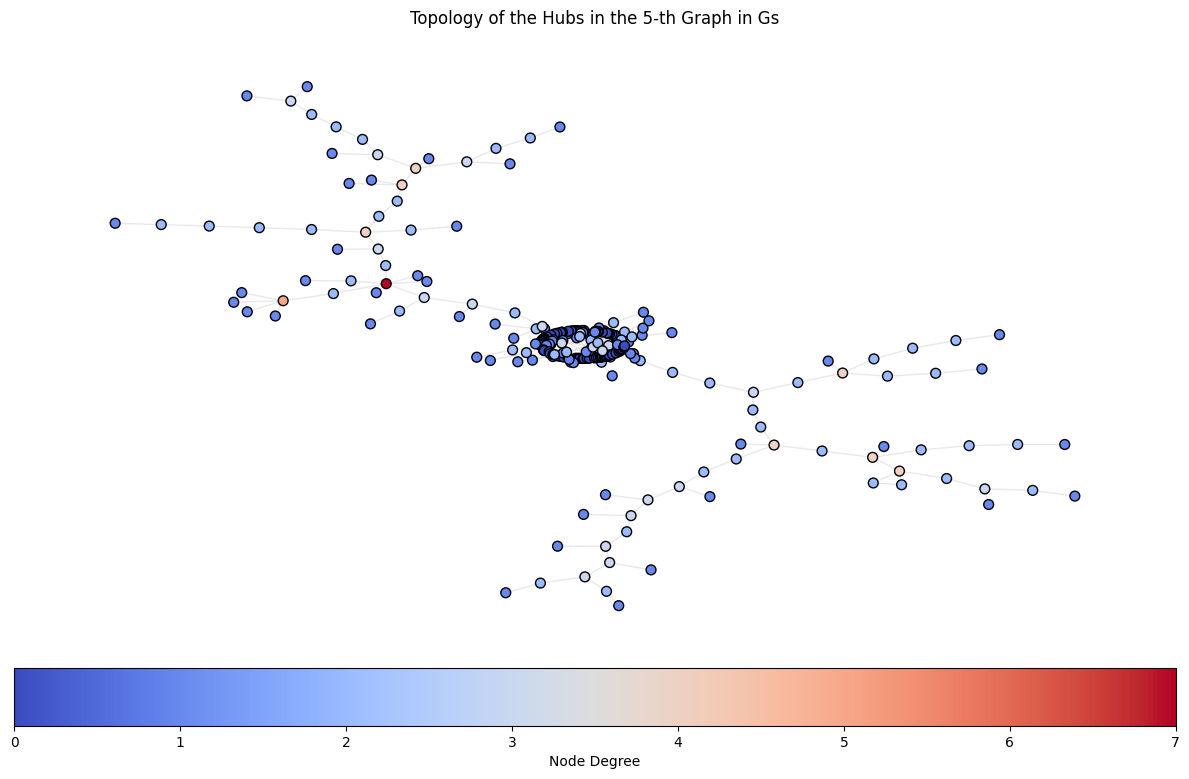

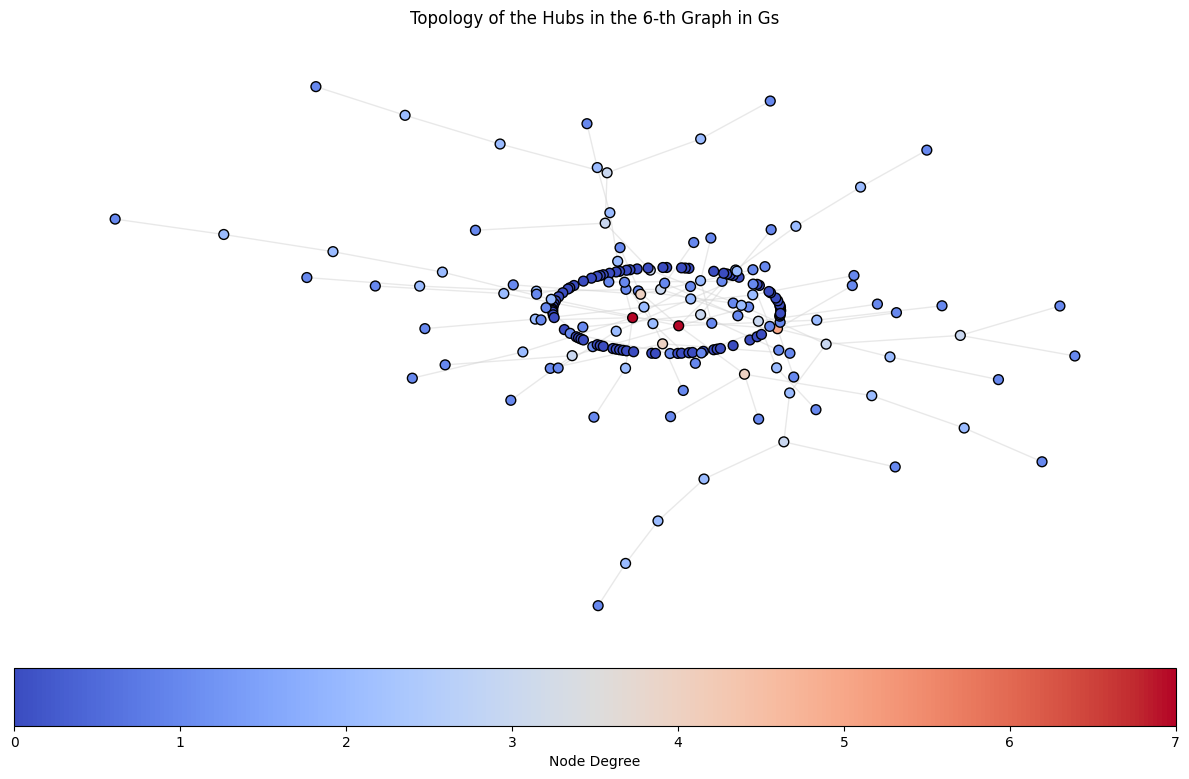

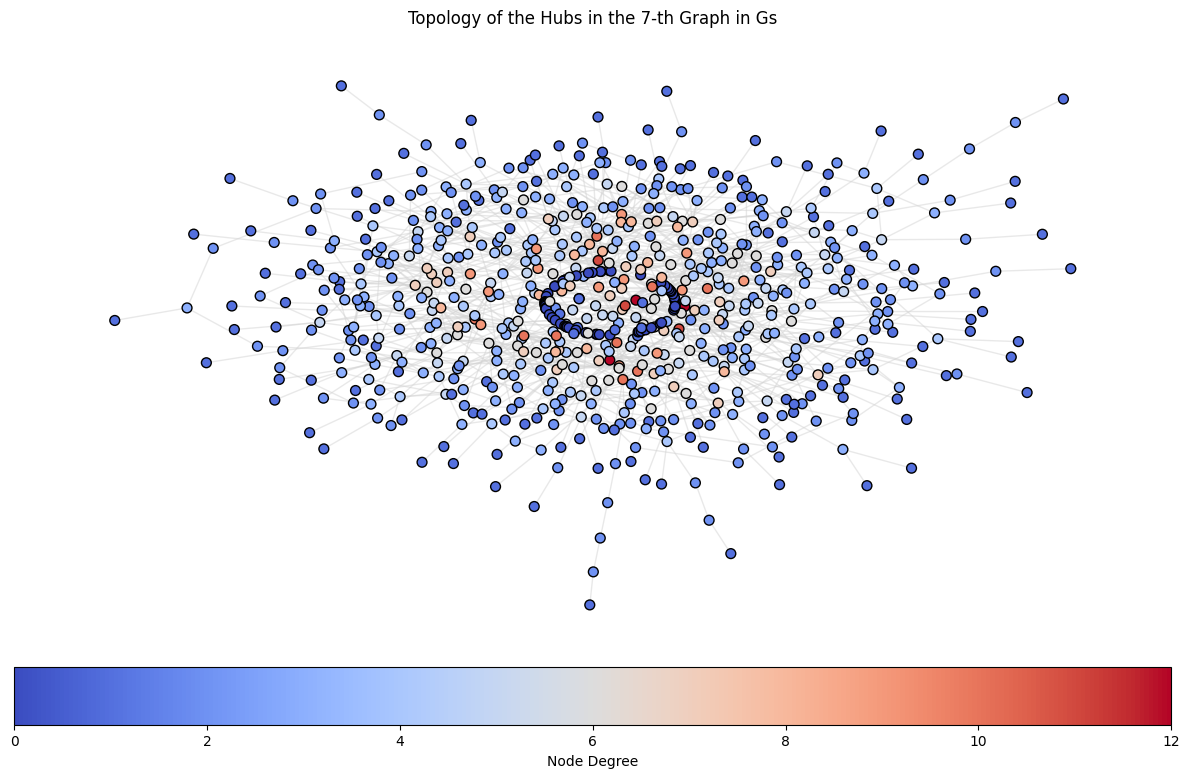

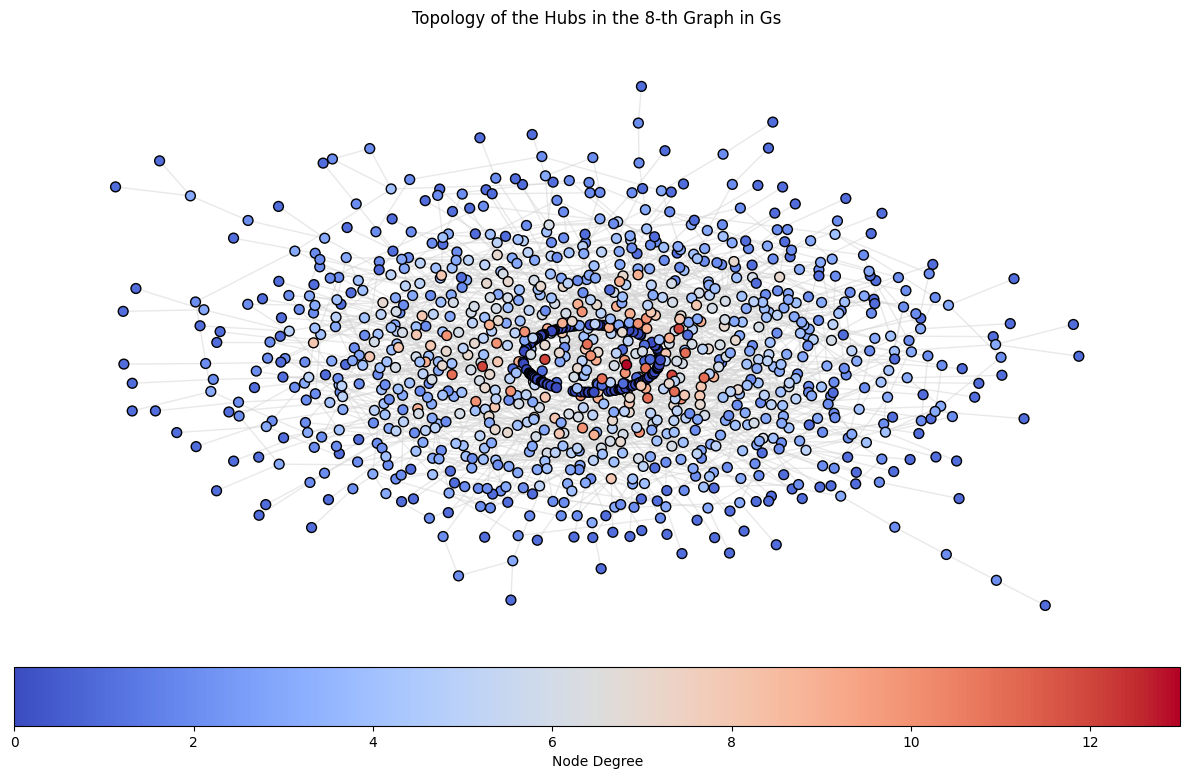

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

for i, G in enumerate(Gs):
    fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for better visualization

    degree_threshold = 20
    node_degrees = dict(G.degree())
    hubs = {node for node, degree in node_degrees.items() if degree > degree_threshold}
    hub_subgraph = G.subgraph(hubs)

    # Kamada-Kawai layout tends to provide an aesthetically pleasing result for a wide variety of graphs.
    pos = nx.kamada_kawai_layout(hub_subgraph)

    # Define node colors based on their degree
    node_colors = [degree for _, degree in hub_subgraph.degree()]
    norm = mpl.colors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    cmap = plt.cm.coolwarm  # Cool to warm colormap
    node_colors = cmap(norm(node_colors))

    nx.draw_networkx_nodes(hub_subgraph, pos, node_size=50, node_color=node_colors, ax=ax, edgecolors='black')
    nx.draw_networkx_edges(hub_subgraph, pos, edge_color='lightgray', alpha=0.5, ax=ax)  # Increased transparency of edges

    ax.set_title(f"Topology of the Hubs in the {i}-th Graph in Gs")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Node Degree', orientation='horizontal', pad=0.01)

    ax.axis('off')  # Turn off the axis
    plt.tight_layout()  # Makes sure the layout is neat
    plt.show()


## Topology All in One

<ipython-input-5-6bd7f9a5ed6c>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('coolwarm', len(Gs))


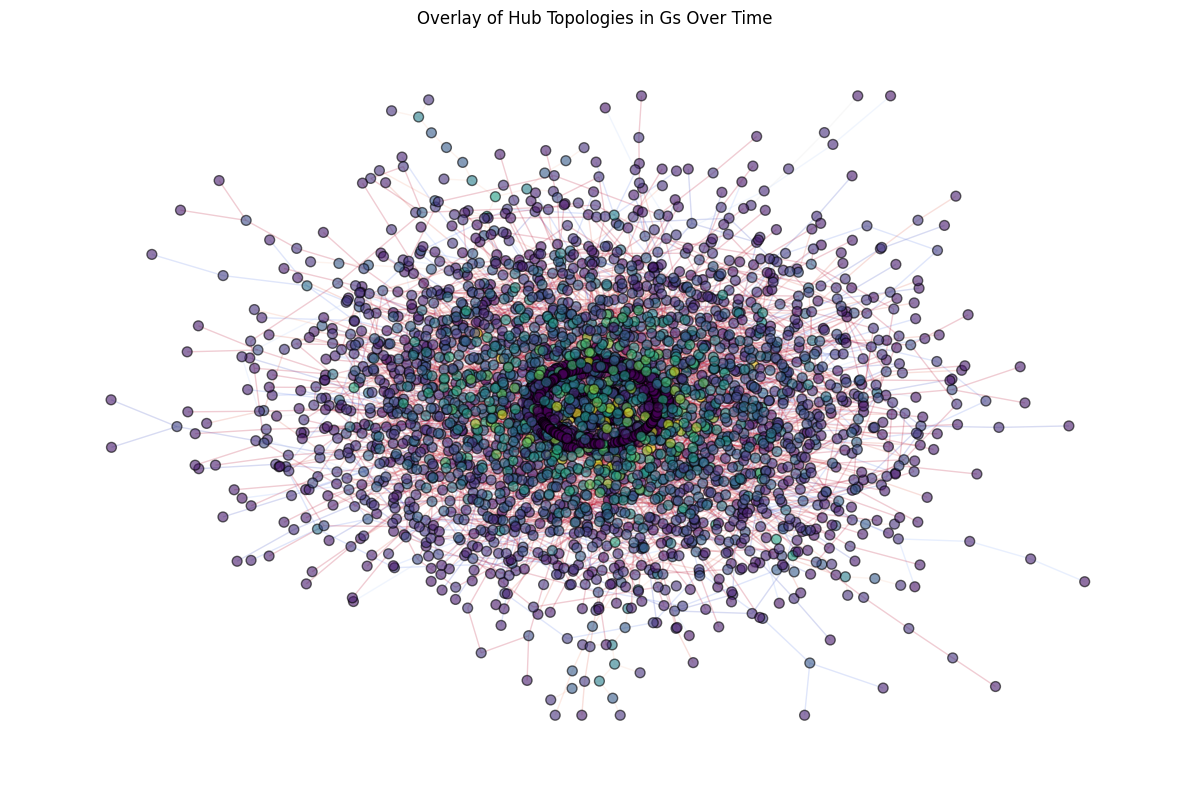

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 8))

# Choose a colormap that varies enough over the range to distinguish different times
color_map = plt.cm.get_cmap('coolwarm', len(Gs))

for idx, G in enumerate(Gs):
    degree_threshold = 20
    node_degrees = dict(G.degree())
    hubs = {node for node, degree in node_degrees.items() if degree > degree_threshold}
    hub_subgraph = G.subgraph(hubs)
    pos = nx.kamada_kawai_layout(hub_subgraph)

    node_colors = [degree for _, degree in hub_subgraph.degree()]
    norm = mpl.colors.Normalize(vmin=min(node_colors), vmax=max(node_colors))

    # Use a different color for each time point
    time_color = color_map(idx)

    nx.draw_networkx_nodes(hub_subgraph, pos, node_size=50, node_color=node_colors, edgecolors='black', alpha=0.6, ax=ax)
    nx.draw_networkx_edges(hub_subgraph, pos, edge_color=time_color, alpha=0.2, ax=ax)  # Lighter edges for overlay

ax.set_title("Overlay of Hub Topologies in Gs Over Time")
ax.axis('off')
plt.tight_layout()
plt.show()


## Network Retention / Dynamics

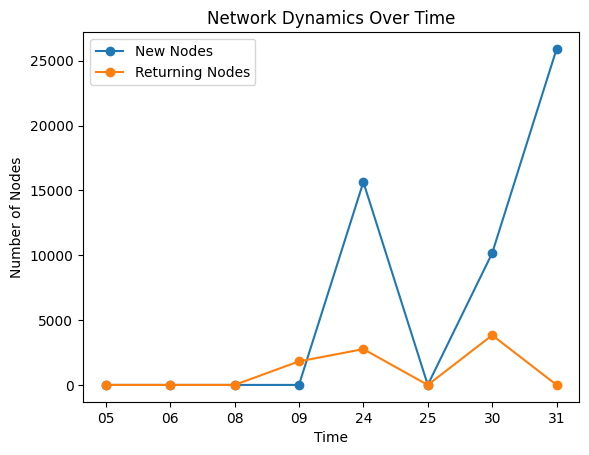

In [ ]:
all_nodes = set(Gs[0].nodes())
new_nodes_counts = []
returning_nodes_counts = []

for i in range(1, len(Gs)):
    nodes_previous = set(Gs[i-1].nodes())
    nodes_current = set(Gs[i].nodes())

    new_nodes = nodes_current - all_nodes
    returning_nodes = nodes_current & (all_nodes - nodes_previous)

    new_nodes_counts.append(len(new_nodes))
    returning_nodes_counts.append(len(returning_nodes))

    all_nodes |= nodes_current

time_points = ['05', '06', '08', '09', '24', '25', '30', '31']

plt.plot(time_points, new_nodes_counts, marker='o', linestyle='-', label="New Nodes")
plt.plot(time_points, returning_nodes_counts, marker='o', linestyle='-', label="Returning Nodes")

plt.xlabel("Time")
plt.ylabel("Number of Nodes")
plt.title("Network Dynamics Over Time")
plt.legend()

plt.show()

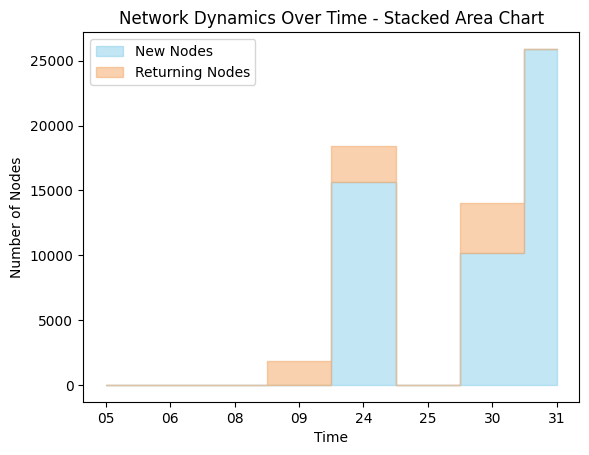

In [9]:
import numpy as np

fig, ax = plt.subplots()

ax.fill_between(time_points, 0, new_nodes_counts, step='mid', label='New Nodes', color='skyblue', alpha=0.5)
ax.fill_between(time_points, new_nodes_counts, np.add(new_nodes_counts, returning_nodes_counts),
                step='mid', label='Returning Nodes', color='sandybrown', alpha=0.5)

ax.set_title('Network Dynamics Over Time - Stacked Area Chart')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Nodes')
ax.legend(loc='upper left')

plt.show()
